In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('Algerian_forest_fires_dataset_Cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [73]:
df=df.drop(['day','month','year'],axis=1)

In [74]:
df['Classes'] = df['Classes'].str.strip()

In [75]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [76]:
df['Classes'] = np.where(df['Classes']=='fire',1,0)

In [77]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [78]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [79]:
X= df.drop('FWI',axis=1)
y= df['FWI']

In [80]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [81]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

<Axes: >

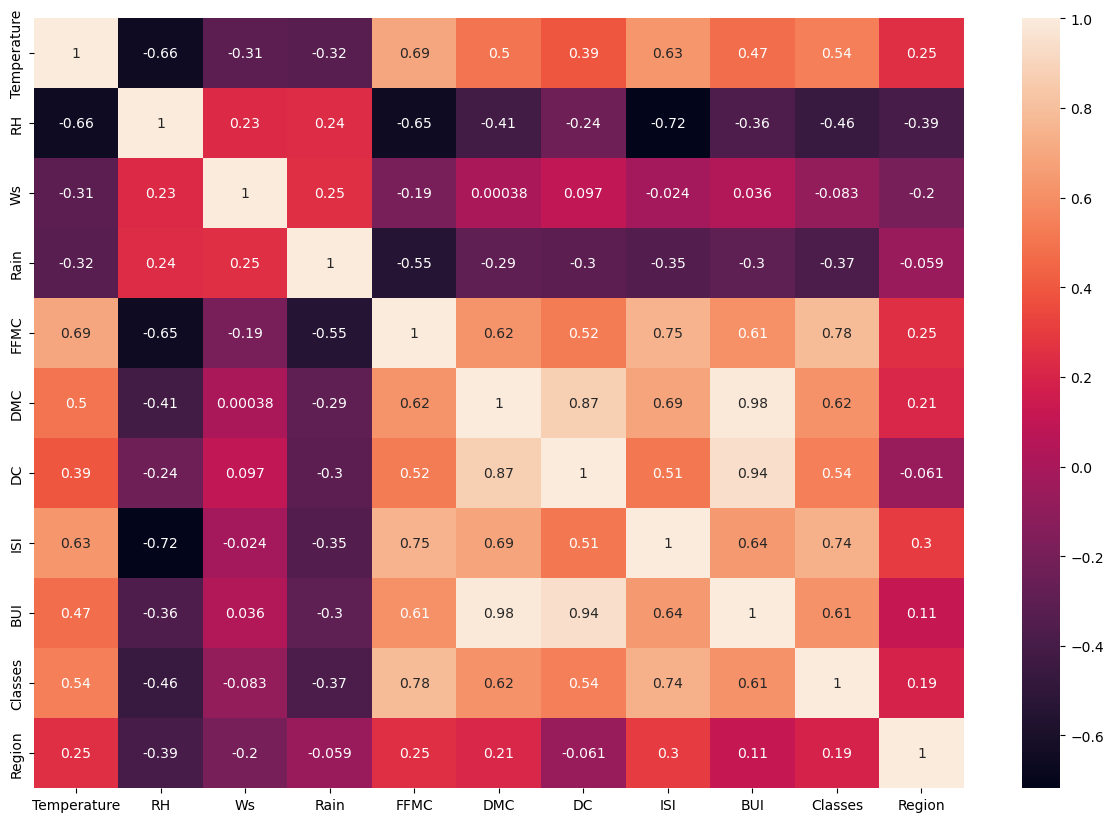

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [83]:
 X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [84]:
def corealation(dataset,threshold):
    corr_set=set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        print(i)
        for j in range(i):
            print(f"{i}{j}")
            print(f"{corr_matrix.columns[i] } {corr_matrix.iloc[i,j]}")
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]   
                corr_set.add(colname)
    return corr_set
                
        

In [85]:
## Threshold is set by the domain Expert
corr_features = corealation(X_train,0.85)

0
1
10
RH -0.6560952065209624
2
20
Ws -0.30597667466611456
21
Ws 0.22573610166999994
3
30
Rain -0.31751247421836215
31
Rain 0.24165583923276368
32
Rain 0.25193172257821067
4
40
FFMC 0.6947684187383468
41
FFMC -0.6530230237613415
42
FFMC -0.19007581851270658
43
FFMC -0.5454912337411976
5
50
DMC 0.4981726049874546
51
DMC -0.4146010743265655
52
DMC 0.0003790727648654189
53
DMC -0.2897539206397506
54
DMC 0.6208074719864948
6
60
DC 0.3906835282526794
61
DC -0.23607825134534496
62
DC 0.09657592917857637
63
DC -0.302340561892003
64
DC 0.5241009027793008
65
DC 0.8686472047539086
7
70
ISI 0.6298481159429918
71
ISI -0.7178043847756409
72
ISI -0.023557548465024735
73
ISI -0.34570667352616263
74
ISI 0.750798797781043
75
ISI 0.6856555396443426
76
ISI 0.5137007275435098
8
80
BUI 0.4736093438255906
81
BUI -0.3623172908447022
82
BUI 0.03563271508216044
83
BUI -0.3009639710245788
84
BUI 0.6072097513090533
85
BUI 0.9831752542959249
86
BUI 0.9424144019919156
87
BUI 0.6438182064577515
9
90
Classes 0.54214

In [86]:
for i in corr_features:
    print(i)

DC
BUI


In [87]:
X_train.drop(['BUI', 'DC'],axis=1,inplace=True)
X_test.drop(['BUI', 'DC'],axis=1,inplace=True)

In [88]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Standariztion

In [89]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scalar=scalar.fit_transform(X_train)
X_test_scalar=scalar.transform(X_test)

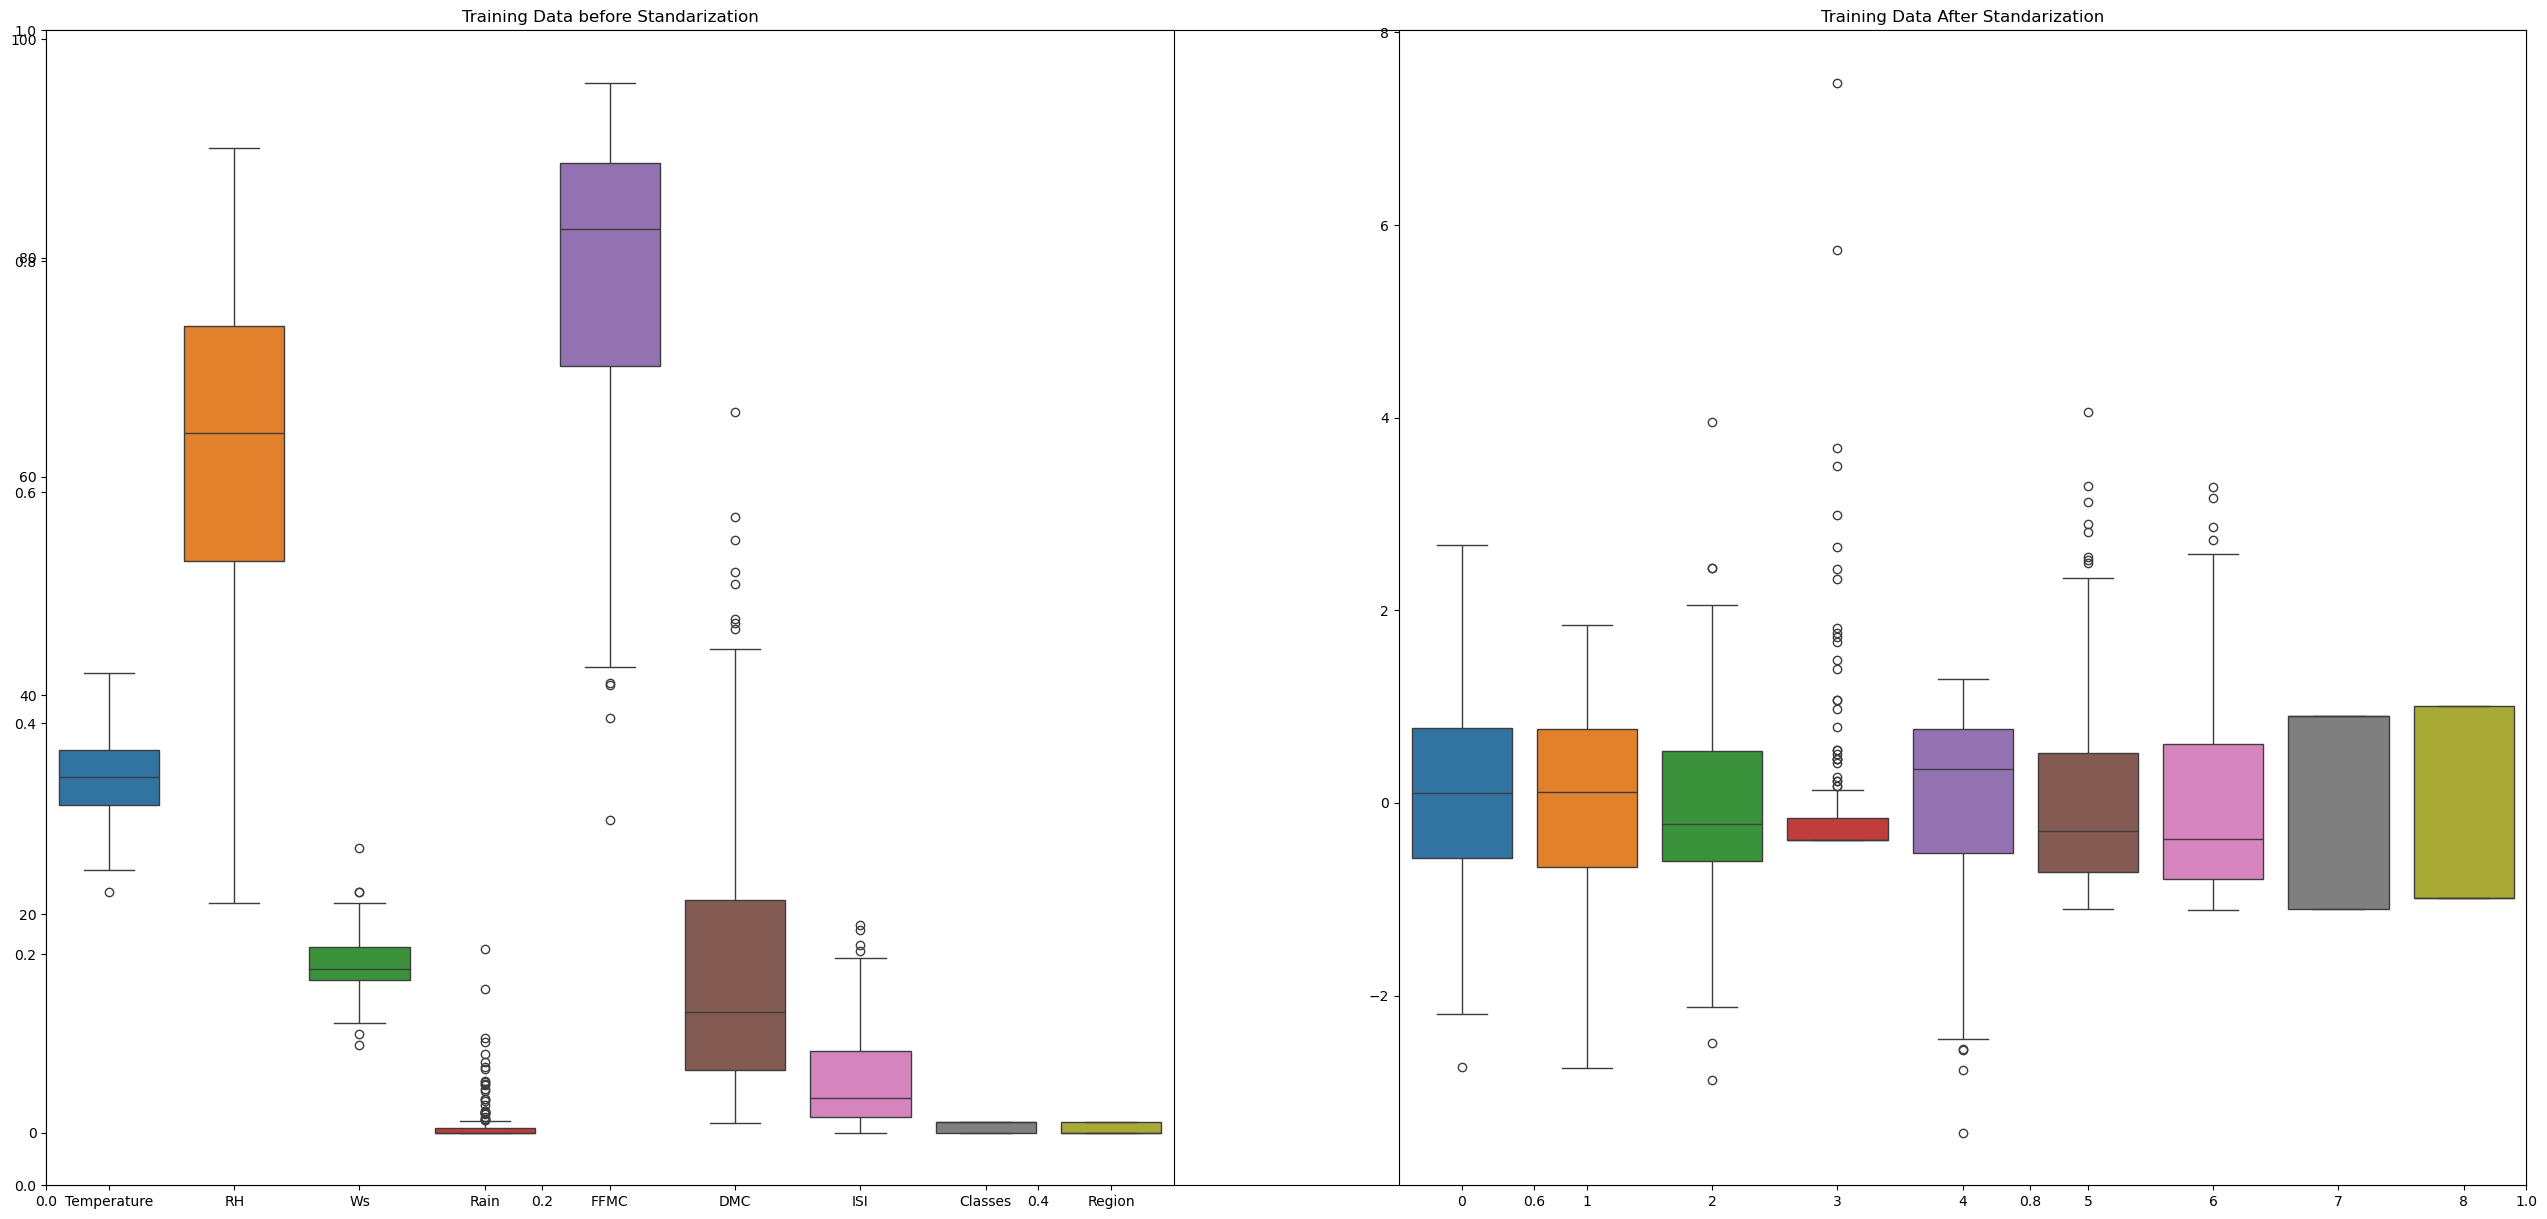

In [90]:
plt.subplots(figsize=(32,15))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('Training Data before Standarization')

plt.subplot(1,2,2)
sns.boxplot(X_train_scalar)
plt.title('Training Data After Standarization')

plt.show()

## Linear Regresssion

mae is 0.5468236465249976
rscore 0.9839977157632893


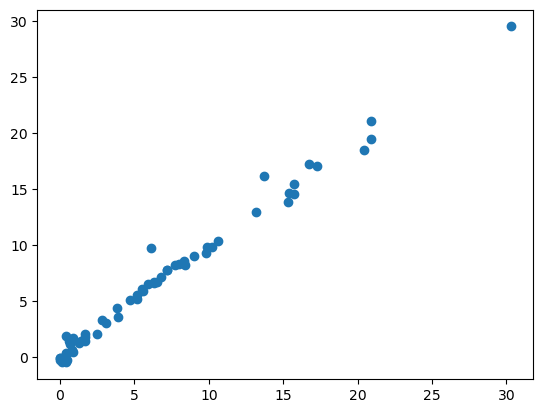

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()

linreg.fit(X_train_scalar,y_train)
y_pred = linreg.predict(X_test_scalar)
mae = mean_absolute_error(y_pred,y_test)
r_score = r2_score(y_pred,y_test)
print(f"mae is {mae}")
print(f"rscore {r_score}")
plt.scatter(y_test,y_pred)


## lasso Regression

mae is 1.1331759949144085
rscore 0.9264742326805692


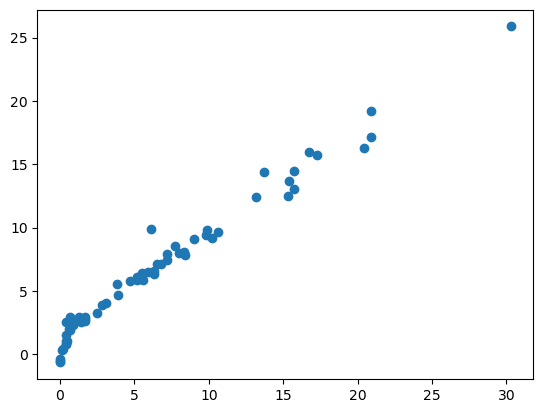

In [92]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()

lasso.fit(X_train_scalar,y_train)
y_pred = lasso.predict(X_test_scalar)
mae = mean_absolute_error(y_pred,y_test)
r_score = r2_score(y_pred,y_test)
print(f"mae is {mae}")
print(f"rscore {r_score}")
plt.scatter(y_test,y_pred)


mae is 0.5642305340105693
rscore 0.9834070933284212


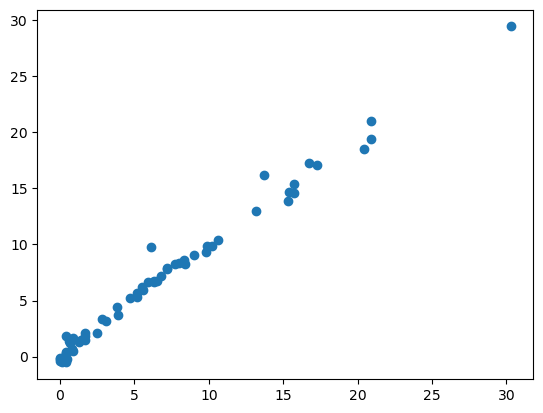

In [93]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()

ridge.fit(X_train_scalar,y_train)
y_pred = ridge.predict(X_test_scalar)
mae = mean_absolute_error(y_pred,y_test)
r_score = r2_score(y_pred,y_test)
print(f"mae is {mae}")
print(f"rscore {r_score}")
plt.scatter(y_test,y_pred)


mae is 1.8822353634896
rscore 0.7814447243400926


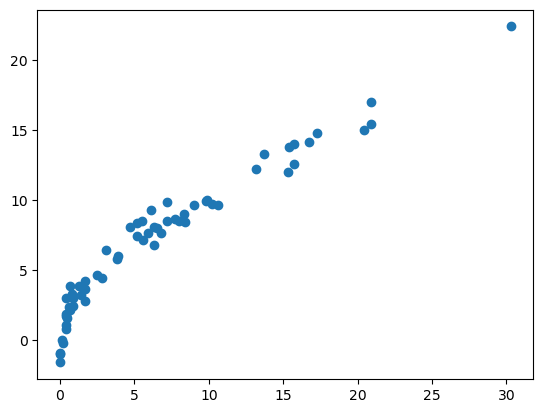

In [94]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()

elastic.fit(X_train_scalar,y_train)
y_pred = elastic.predict(X_test_scalar)
mae = mean_absolute_error(y_pred,y_test)
r_score = r2_score(y_pred,y_test)
print(f"mae is {mae}")
print(f"rscore {r_score}")
plt.scatter(y_test,y_pred)


mae is 0.6199701158263431
rscore 0.980851982434192


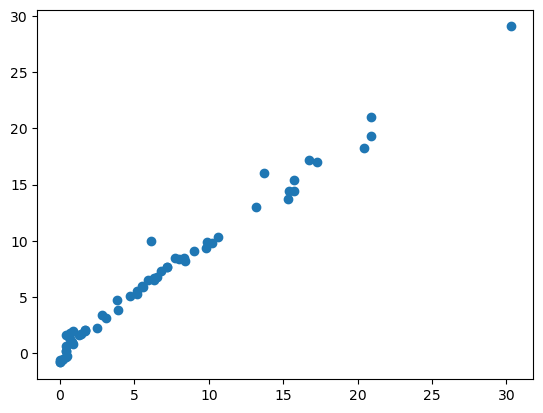

In [95]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv = LassoCV(cv=5)

lassocv.fit(X_train_scalar,y_train)
y_pred = lassocv.predict(X_test_scalar)
mae = mean_absolute_error(y_pred,y_test)
r_score = r2_score(y_pred,y_test)
print(f"mae is {mae}")
print(f"rscore {r_score}")
plt.scatter(y_test,y_pred)


In [96]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [97]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

mae is 0.5642305340105693
rscore 0.9834070933284212


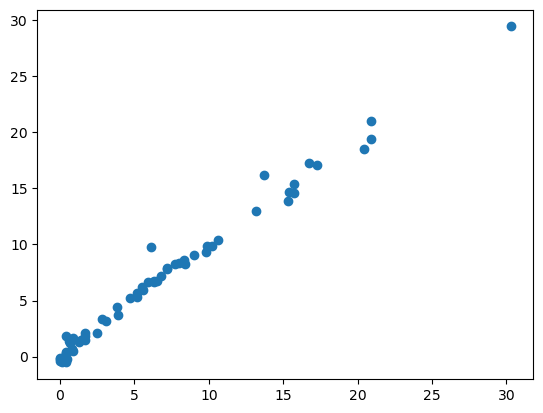

In [98]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv = RidgeCV(cv=5)

ridgecv.fit(X_train_scalar,y_train)
y_pred = ridgecv.predict(X_test_scalar)
mae = mean_absolute_error(y_pred,y_test)
r_score = r2_score(y_pred,y_test)
print(f"mae is {mae}")
print(f"rscore {r_score}")
plt.scatter(y_test,y_pred)


mae is 0.6575946731430904
rscore 0.9799084998743879


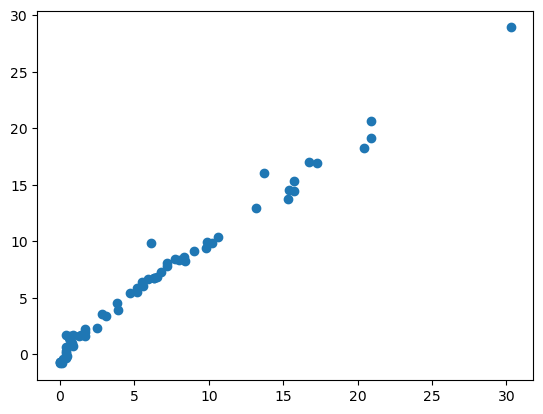

In [99]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticcv = ElasticNetCV()

elasticcv.fit(X_train_scalar,y_train)
y_pred = elasticcv.predict(X_test_scalar)
mae = mean_absolute_error(y_pred,y_test)
r_score = r2_score(y_pred,y_test)
print(f"mae is {mae}")
print(f"rscore {r_score}")
plt.scatter(y_test,y_pred)


In [103]:
import pickle 

pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ridgecv,open('ridgecv.pkl','wb'))